In [ ]:
%load_ext autoreload
%autoreload 2
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
from scipy.optimize import curve_fit

MPL_CUSTOM = {
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
    'figure.dpi': 120,
    'figure.figsize': (4, 3.5),
    'figure.facecolor': 'white',
    'xtick.top': True,
    'xtick.direction': 'in',
    'xtick.minor.visible': True,
    'ytick.right': True,
    'ytick.direction': 'in',
    'ytick.minor.visible': True,
}

for k, v in MPL_CUSTOM.items():
    mpl.rcParams[k] = v

In [ ]:
data_dir = Path('./tof_data')
files = sorted([f for f in data_dir.glob('*.dat')])
fbin = [int(re.findall(r'(\d+)', str(f))[0]) for f in files]
dfs = [pd.read_csv(str(f), sep=r'\s+', names=['x', 'y', 'yerr'], header=None) for i, f in enumerate(files) if fbin[i] <= 29]

In [ ]:
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

def fit(data, xrange):
    df = data.query(f'{xrange[0]} <= x <= {xrange[1]}')
    popt, pcov = curve_fit(
        gaussian,
        df.x.values,
        df.y.values,
        # p0=[200, -8, 1],
        # sigma=df.yerr.values,
        # absolute_sigma=True,
    )
    return popt

In [59]:
x_range = [-9, -8]

In [60]:
fit(
    dfs[10], x_range
)

/tmp/ipykernel_1845438/3242066143.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(


array([1., 1., 1.])

<ErrorbarContainer object of 3 artists>

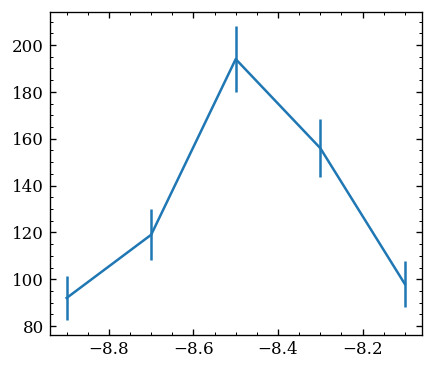

In [61]:
fig, ax = plt.subplots()
df_ = dfs[10].query(f'{x_range[0]} <= x <= {x_range[1]}')
ax.errorbar(df_.x, df_.y, yerr=df_.yerr)

In [ ]:
for i, df in enumerate(dfs):
    fig, ax = plt.subplots()
    df_ = df.query(f'{x_range[0]} <= x <= {x_range[1]}')
    ax.errorbar(df_.x, df_.y, yerr=df_.yerr)